## Assignment part2: Image Operations with PyTorch TorchVision Transforms

For this assignment, please review the [TorchVision Transforms Documentation](https://pytorch.org/vision/main/transforms.html) to understand the available image transformations.

### Your Task:
- Convert the loaded image (which is currently a NumPy array) into a PIL Image or PyTorch tensor as needed.
- Apply at least two different transformations from the `torchvision.transforms` module (for example, `RandomCrop`, `ColorJitter`, or `Resize`).
- Chain these transformations using `transforms.Compose`.
- Finally, display the transformed image.




### Solution:

#### I. Import required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image

#### II. Load image function

In [2]:
def load_image(path='input_image.jpg'):
    """Load an image from the specified path."""
    image = cv2.imread(path)
    if image is None:
        raise ValueError(f"Could not load image from {path}")

    # Convert from BGR (OpenCV format) to RGB (for PIL/PyTorch)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

#### III. Apply transformations function

In [3]:
def apply_torch_transforms(image_rgb):
    """
    Apply various TorchVision transforms to the input image.

    Args:
        image_rgb: A NumPy array containing an RGB image

    Returns:
        A dictionary containing the original and transformed images
    """
    # Convert NumPy array to PIL Image (required for many torchvision transforms)
    pil_image = Image.fromarray(image_rgb)

    # Create individual transforms

    # 1. Resize transform: resize the image to 256x256 pixels
    resize_transform = transforms.Resize((256, 256))

    # 2. Random crop transform: crop a random 224x224 portion of the image
    random_crop_transform = transforms.RandomCrop((224, 224))

    # 3. Color jitter transform: adjust brightness, contrast, saturation, and hue
    color_jitter_transform = transforms.ColorJitter(
        brightness=0.5,  # Random brightness adjustment
        contrast=0.5,    # Random contrast adjustment
        saturation=0.5,  # Random saturation adjustment
        hue=0.3          # Random hue adjustment
    )

    # 4. Random rotation transform: rotate image by a random angle
    rotation_transform = transforms.RandomRotation(degrees=30)

    # 5. Horizontal flip transform: flip image horizontally (mirror effect)
    # Using HorizontalFlip instead of RandomHorizontalFlip to ensure the effect always happens
    horizontal_flip_transform = transforms.RandomHorizontalFlip(p=1.0)  # p=1.0 ensures it always flips

    # 6. Random grayscale transform: convert to grayscale with 20% chance
    grayscale_transform = transforms.RandomGrayscale(p=0.2)

    # Chain transforms using transforms.Compose
    # Let's create several combinations of transforms

    # Combination 1: Resize + RandomCrop
    transform_chain1 = transforms.Compose([
        resize_transform,
        random_crop_transform
    ])

    # Combination 2: Resize + ColorJitter + RandomRotation
    transform_chain2 = transforms.Compose([
        resize_transform,
        color_jitter_transform,
        rotation_transform
    ])

    # Combination 3: Resize + HorizontalFlip + RandomGrayscale
    transform_chain3 = transforms.Compose([
        resize_transform,
        horizontal_flip_transform,  # Now always flips with p=1.0
        grayscale_transform
    ])

    # Alternative using direct horizontal flip for comparison
    # This uses the non-random version that always flips
    direct_horizontal_flip = transforms.Compose([
        resize_transform,
        transforms.functional.hflip,  # Always flips (functional version)
    ])

    # Apply the transform chains
    transformed_image1 = transform_chain1(pil_image)
    transformed_image2 = transform_chain2(pil_image)
    transformed_image3 = transform_chain3(pil_image)

    # Apply the direct horizontal flip for comparison
    directly_flipped = transforms.functional.hflip(pil_image)

    # Convert the PIL Images back to NumPy arrays for visualization
    transformed_array1 = np.array(transformed_image1)
    transformed_array2 = np.array(transformed_image2)
    transformed_array3 = np.array(transformed_image3)
    directly_flipped_array = np.array(directly_flipped)

    # Create PyTorch tensors (optional, to demonstrate tensor conversion)
    # This transforms the image from a PIL image to a PyTorch tensor
    # and normalizes the values from [0, 255] to [0, 1]
    to_tensor_transform = transforms.ToTensor()

    # Additionally, we can normalize using specific mean and std values
    # (commonly used for pretrained models)
    normalize_transform = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet mean values
        std=[0.229, 0.224, 0.225]    # ImageNet std values
    )

    # Combination 4: Convert to tensor and normalize
    transform_chain4 = transforms.Compose([
        to_tensor_transform,
        normalize_transform
    ])

    # Apply tensor transformation
    tensor_image = transform_chain4(pil_image)

    # Convert tensor back to numpy for visualization
    # We need to denormalize and convert from [0,1] back to [0,255]
    tensor_image_np = tensor_image.numpy()

    # Denormalize
    tensor_image_np = tensor_image_np * np.array([0.229, 0.224, 0.225])[:, None, None] + np.array([0.485, 0.456, 0.406])[:, None, None]

    # Clip values to [0, 1] range
    tensor_image_np = np.clip(tensor_image_np, 0, 1)

    # Transpose from (C, H, W) to (H, W, C) format
    tensor_image_np = tensor_image_np.transpose(1, 2, 0)

    # Convert to uint8 for display
    tensor_image_np = (tensor_image_np * 255).astype(np.uint8)

    return {
        'original': image_rgb,
        'resize_crop': transformed_array1,
        'color_jitter_rotation': transformed_array2,
        'flip_grayscale': transformed_array3,
        'tensor_normalized': tensor_image_np,
        'direct_flip': directly_flipped_array
    }

#### IV. Display transformed images

In [4]:
def display_transformed_images(images_dict):
    """Display the original and transformed images side by side."""
    # Create a figure with subplots
    plt.figure(figsize=(15, 12))

    # Display original image
    plt.subplot(2, 3, 1)
    plt.imshow(images_dict['original'])
    plt.title('Original Image')

    # Display transformed images
    plt.subplot(2, 3, 2)
    plt.imshow(images_dict['resize_crop'])
    plt.title('Resize + Random Crop')

    plt.subplot(2, 3, 3)
    plt.imshow(images_dict['color_jitter_rotation'])
    plt.title('Color Jitter + Rotation')

    plt.subplot(2, 3, 4)
    plt.imshow(images_dict['flip_grayscale'])
    plt.title('Horizontal Flip + Grayscale')

    plt.subplot(2, 3, 5)
    plt.imshow(images_dict['tensor_normalized'])
    plt.title('Tensor + Normalized')

    # Display direct horizontal flip for comparison
    plt.subplot(2, 3, 6)
    plt.imshow(images_dict['direct_flip'])
    plt.title('Direct Horizontal Flip (Mirror)')

    plt.tight_layout()
    plt.show()

    # Create a separate figure to clearly demonstrate the horizontal flip effect
    plt.figure(figsize=(12, 6))

    # Display original and flipped images side by side
    plt.subplot(1, 2, 1)
    plt.imshow(images_dict['original'])
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(images_dict['direct_flip'])
    plt.title('Horizontally Flipped (Mirrored)')

    plt.tight_layout()
    plt.show()

#### V. Execute transformations

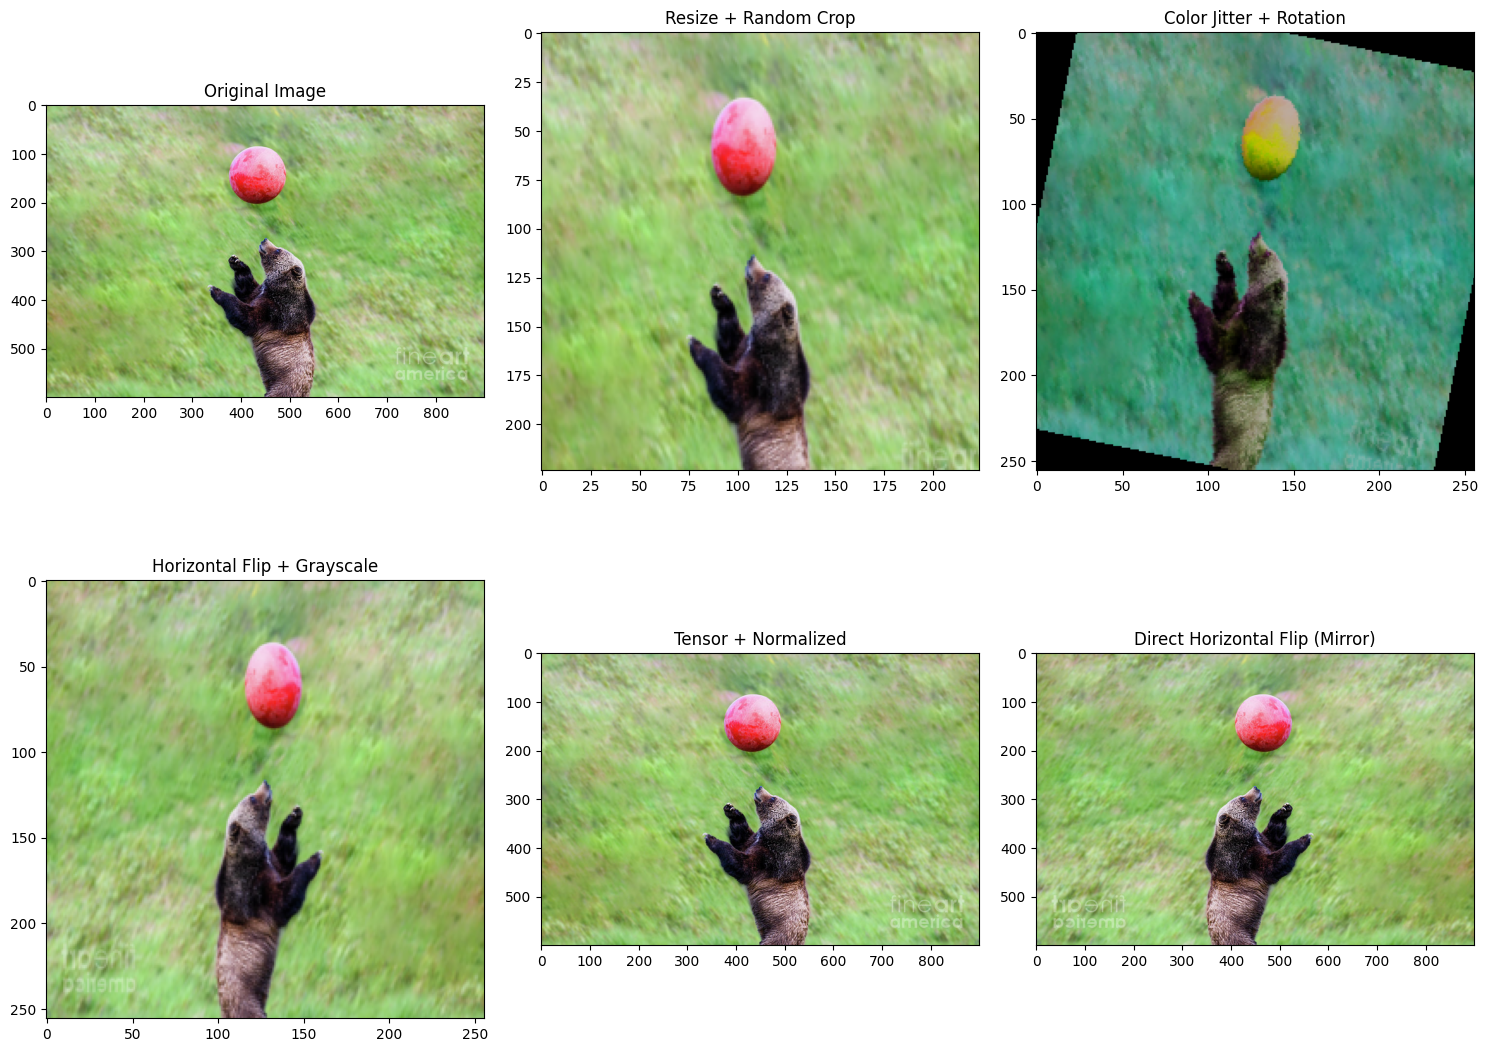

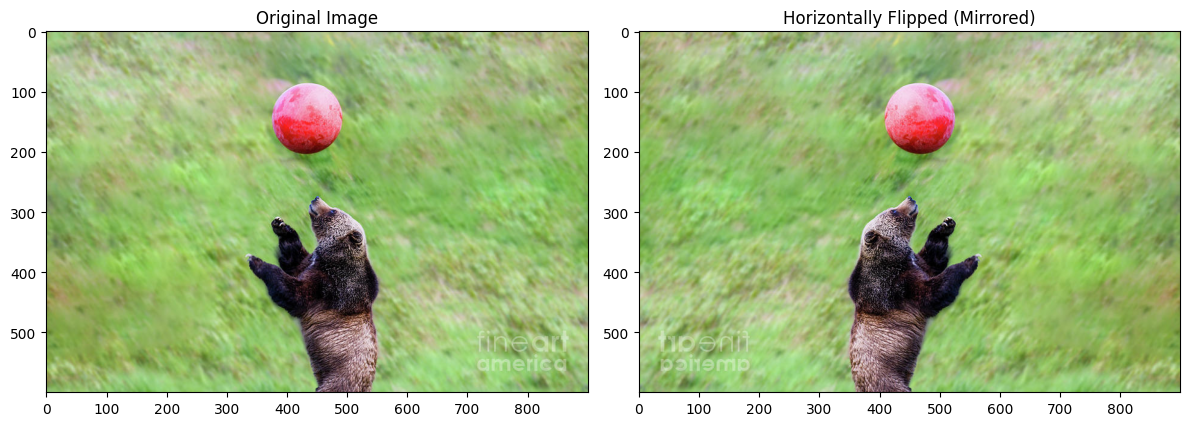

Image transformations completed successfully!


In [8]:
def main():
    """Main function to run the TorchVision transform demonstration."""
    try:
        # Load image (replace with actual image path in the Colab environment)
        image_rgb = load_image('bear.jpg')

        # Apply TorchVision transforms
        transformed_images = apply_torch_transforms(image_rgb)

        # Display the results
        display_transformed_images(transformed_images)

        print("Image transformations completed successfully!")
    except Exception as e:
        print(f"Error: {e}")

# Execute the main function
if __name__ == "__main__":
    main()